# The pursuit of Happiness
### How do certain social factors effect happiness around the world?
 * Religiosity
 * Religous Homogeneity
 * Education Spending

***
#### Importing Data from World Happiness Report and PEW Research Center World Religion Report

In [30]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Religiosity

R^2 = 0.14639060451238184


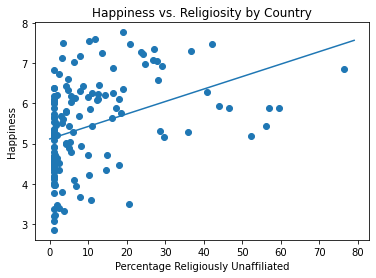

In [31]:
X = np.array(happiness_and_religion['Unaffiliated']).reshape(-1, 1)
y = happiness_and_religion['Score']
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
y_predicted = reg.predict(np.arange(0, 80).reshape(-1, 1))
plt.plot(np.arange(0, 80), y_predicted)
plt.scatter(happiness_and_religion['Unaffiliated'], happiness_and_religion['Score'])
plt.xlabel('Percentage Religiously Unaffiliated')
plt.ylabel('Happiness')
plt.title("Happiness vs. Religiosity by Country");

### Most Unreligous Country

In [32]:
print(happiness_and_religion.query("Unaffiliated > 70").index[0])

Czech Republic


### Most unreligous but unhappy Country

In [33]:
print(happiness_and_religion.query("Unaffiliated > 15 and Score < 4").index[0])

Botswana


## Religous Homogeneity

R^2 = 0.027602381844222035


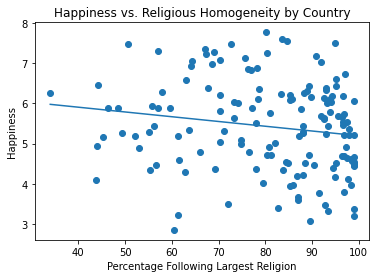

In [35]:
X = np.array(happiness_and_religion['Largest Religion']).reshape(-1, 1)
y = happiness_and_religion['Score']
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
y_predicted = reg.predict(np.arange(34, 100).reshape(-1, 1))
plt.scatter(happiness_and_religion['Largest Religion'], happiness_and_religion['Score'])
plt.plot(np.arange(34, 100), y_predicted)
plt.xlabel('Percentage Following Largest Religion')
plt.ylabel('Happiness')
plt.title("Happiness vs. Religious Homogeneity by Country");

#### Most religously heterogenous

In [6]:
print(happiness_and_religion.query("`Largest Religion` < 40").index[0])

Singapore


In [64]:
print(happiness_and_religion.loc[["Singapore"]])

           Overall rank  Score  GDP per capita  Social support  \
Singapore            34  6.262           1.572           1.463   

           Healthy life expectancy  Freedom to make life choices  Generosity  \
Singapore                    1.141                         0.556       0.271   

           Perceptions of corruption  Year        Region  Buddhists  \
Singapore                      0.453  2010  Asia-Pacific       33.9   

           Christians  Folk Religions  Hindus  Jews  Muslims  Other Religions  \
Singapore        18.2             2.3     5.2   1.0     14.3              9.7   

           Unaffiliated  Largest Religion  
Singapore          16.4              33.9  


In [57]:
print(happiness_and_religion[happiness_and_religion["Largest Religion"] < 40])

           Overall rank  Score  GDP per capita  Social support  \
Singapore            34  6.262           1.572           1.463   

           Healthy life expectancy  Freedom to make life choices  Generosity  \
Singapore                    1.141                         0.556       0.271   

           Perceptions of corruption  Year        Region  Buddhists  \
Singapore                      0.453  2010  Asia-Pacific       33.9   

           Christians  Folk Religions  Hindus  Jews  Muslims  Other Religions  \
Singapore        18.2             2.3     5.2   1.0     14.3              9.7   

           Unaffiliated  Largest Religion  
Singapore          16.4              33.9  


## Education Spending

Text(0.5, 1.0, 'Happiness vs. Education Spending by Country')

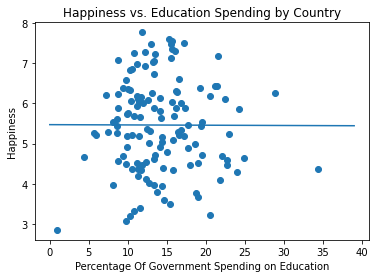

In [47]:
%%capture --no-display
education = pd.read_csv('education.csv', index_col="Country Name")
latest_indices = education.apply(pd.Series.last_valid_index, 1)
education['Latest'] = education.lookup(latest_indices.index, latest_indices.values)
education = education[education['Latest'].str.isnumeric().isnull()]
happiness_and_education = happiness.copy().join(education, how='inner')

X = np.array(happiness_and_education['Latest']).reshape(-1, 1)
y = happiness_and_education['Score']
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
y_predicted = reg.predict(np.arange(0, 40).reshape(-1, 1))

plt.scatter(happiness_and_education['Latest'], happiness_and_education['Score'])
plt.plot(np.arange(0, 40), y_predicted)
plt.xlabel('Percentage Of Government Spending on Education')
plt.ylabel('Happiness')
plt.title("Happiness vs. Education Spending by Country");

### Most Spent on Education

In [31]:
print(happiness_and_education.query("`Latest` > 30").index[0])

Sierra Leone


### Least Spent on Education

In [32]:
print(happiness_and_education.query("`Latest` < 3").index[0])

South Sudan


### Happiest Country that Spends the Most on Education

In [48]:
print(happiness_and_education.query("`Latest` > 25 and Score > 6").index[0])

Singapore
